<a href="https://colab.research.google.com/github/YasinnSoylu/Self_Organizing_Maps/blob/main/Self_Organizing_Maps_(SOMs)_ANAMOL%C4%B0_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [ ]:
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.data.select_dtypes(include=[np.number])
y = housing.target

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
som_size = 25
iterations = 10000
sigma = 1.0
learning_rate = 0.5

som = MiniSom(som_size, som_size, X_normalized.shape[1], sigma=sigma, learning_rate=learning_rate, random_seed=42)
som.random_weights_init(X_train)
som.train_random(X_train, iterations)



In [ ]:
winners = []
errors = []

for x, t in zip(X_test, y_test):
    winner = som.winner(x)
    winners.append(winner)
    errors.append(mean_squared_error(som.get_weights()[winner], x))

errors = np.array(errors)
winners = np.array(winners)

threshold = np.percentile(errors, 95)  # %95'lik eşik değeri
outliers = np.where(errors > threshold)



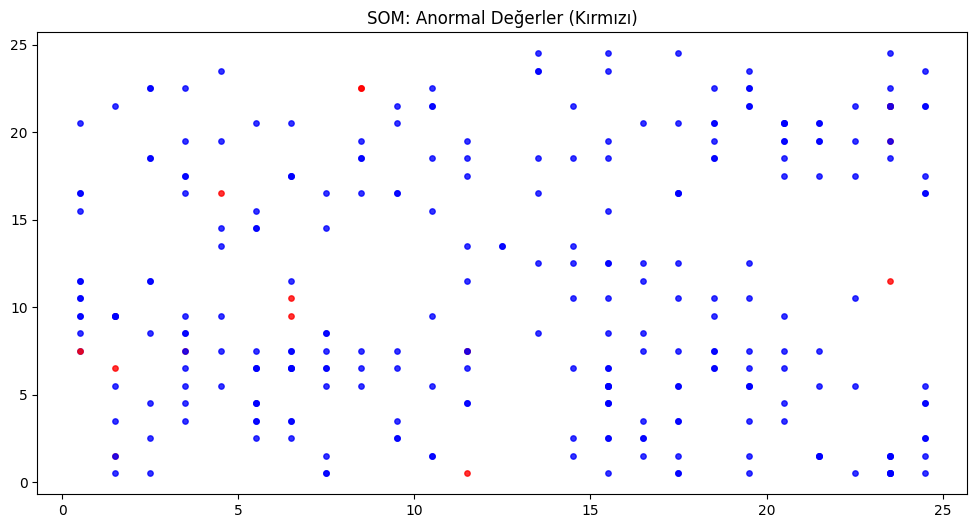

In [ ]:
plt.figure(figsize=(12, 6))

for i, (x, t) in enumerate(zip(X_test, y_test)):
    winner = som.winner(x)
    if i in outliers[0]:
        plt.scatter(winner[0]+0.5, winner[1]+0.5, c='red', marker='o', s=15, alpha=0.8)
    else:
        plt.scatter(winner[0]+0.5, winner[1]+0.5, c='blue', marker='o', s=15, alpha=0.8)


plt.title("SOM: Anormal Değerler (Kırmızı)")
plt.show()






In [ ]:
# Anormal değerlerin özelliklerini ve hedef değerlerini (fiyatları) elde edin
outlier_indices = outliers[0]
outlier_features = X.iloc[outlier_indices]
outlier_targets = y.iloc[outlier_indices]

# Anormal değerlerin özelliklerini ve hedef değerlerini bir DataFrame'e atayın
outliers_df = pd.concat([outlier_features, outlier_targets], axis=1)
outliers_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,140,0,0,0,176,0,0,9,2008,144000
32,33,20,85.0,11049,8,5,2007,2007,0.0,0,...,0,30,0,0,0,0,0,1,2008,179900
53,54,20,68.0,50271,9,5,1981,1987,0.0,1810,...,857,72,0,0,0,0,0,11,2006,385000
102,103,90,64.0,7018,5,5,1979,1979,0.0,0,...,0,0,0,0,0,0,0,6,2009,118964
105,106,60,75.0,9375,8,5,2003,2004,768.0,0,...,140,45,0,0,0,0,0,8,2008,250000
119,120,60,65.0,8461,6,5,2005,2006,0.0,0,...,0,24,0,0,0,0,0,7,2006,163990
136,137,20,NaN,10355,5,5,1967,1967,196.0,695,...,0,111,0,0,0,0,0,7,2007,143000
139,140,60,65.0,15426,6,5,1997,1997,0.0,821,...,276,99,0,0,0,0,0,8,2009,231500
140,141,20,70.0,10500,4,5,1971,1971,0.0,432,...,0,0,0,0,0,0,0,4,2010,115000
152,153,60,NaN,14803,6,5,1971,1971,252.0,416,...,0,66,0,0,0,0,0,6,2006,190000


In [ ]:
outlier_indices = outliers[0]
outlier_errors = errors[outlier_indices]




print("Anormal değerlerin hataları:")
for idx, error in zip(outlier_indices, outlier_errors):
    print(f"İndeks: {idx}, Hata: {error}")


Anormal değerlerin hataları:
İndeks: 12, Hata: 0.775871441037231
İndeks: 32, Hata: 1.6546459654206167
İndeks: 53, Hata: 0.9140206733823314
İndeks: 102, Hata: 0.9124251760713894
İndeks: 105, Hata: 0.7785760226589875
İndeks: 119, Hata: 0.9120601511643389
İndeks: 136, Hata: 0.9401724212889409
İndeks: 139, Hata: 1.2509202911390318
İndeks: 140, Hata: 0.9955258097110022
İndeks: 152, Hata: 1.4524197587084169
İndeks: 156, Hata: 0.8414731702027172
İndeks: 161, Hata: 0.8724031451055809
İndeks: 166, Hata: 1.1973056482773998
İndeks: 216, Hata: 1.583127289712716
İndeks: 263, Hata: 0.9177169445301342


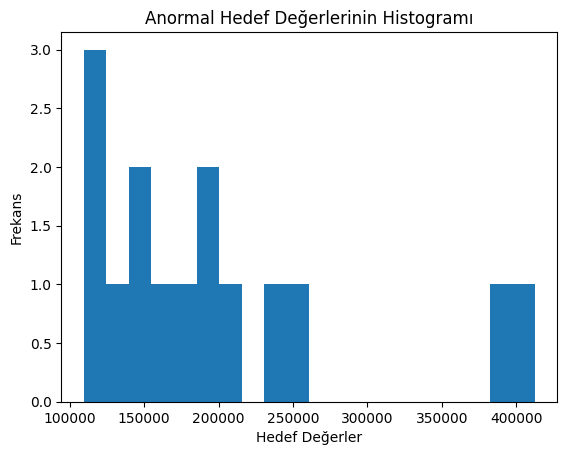

In [ ]:
plt.hist(outlier_targets, bins=20)
plt.xlabel('Hedef Değerler')
plt.ylabel('Frekans')
plt.title('Anormal Hedef Değerlerinin Histogramı')
plt.show()





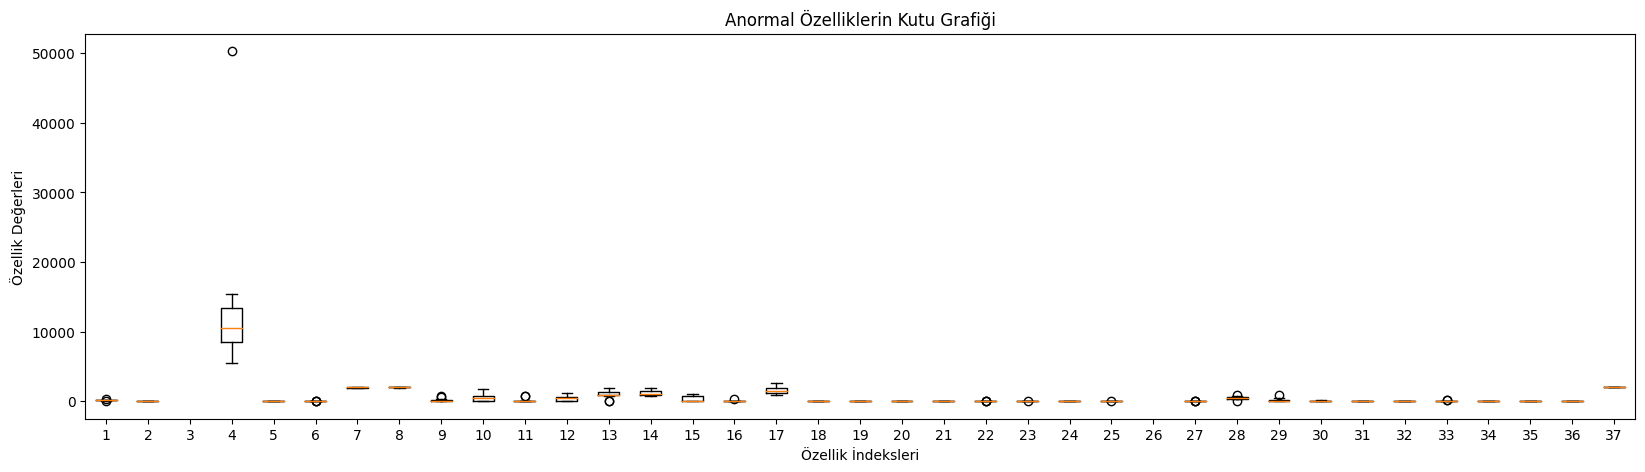

In [ ]:
fig = plt.figure(figsize=(20, 5))

plt.boxplot(outlier_features, vert=True)
plt.ylabel('Özellik Değerleri')
plt.xlabel('Özellik İndeksleri')
plt.title('Anormal Özelliklerin Kutu Grafiği')
plt.show()

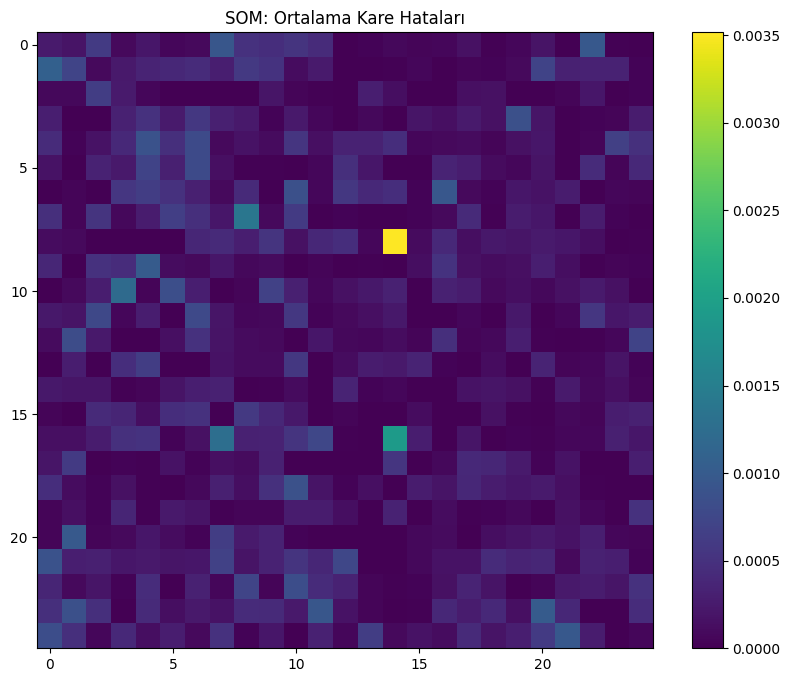

In [ ]:
plt.figure(figsize=(10, 8))
mse_matrix = np.zeros((som_size, som_size))
for i, (x, t) in enumerate(zip(X_train, y_train)):
    winner = som.winner(x)
    mse_matrix[winner[0], winner[1]] += mean_squared_error(som.get_weights()[winner], x)
mse_matrix /= len(X_train)
plt.imshow(mse_matrix, cmap='viridis')
plt.colorbar()
plt.title("SOM: Ortalama Kare Hataları")
plt.show()


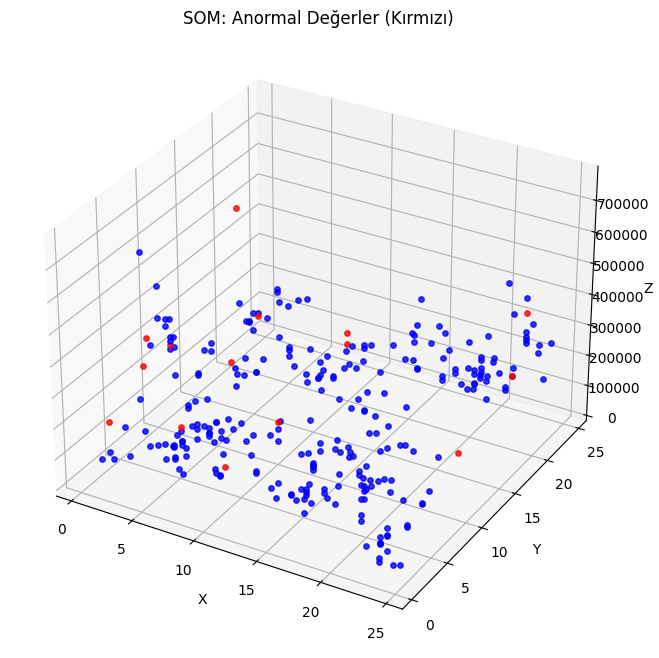

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, (x, t) in enumerate(zip(X_test, y_test)):
    winner = som.winner(x)
    if i in outliers[0]:
        ax.scatter(winner[0]+0.5, winner[1]+0.5, t, c='red', marker='o', s=15, alpha=0.8)
    else:
        ax.scatter(winner[0]+0.5, winner[1]+0.5, t, c='blue', marker='o', s=15, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("SOM: Anormal Değerler (Kırmızı)")
plt.show()


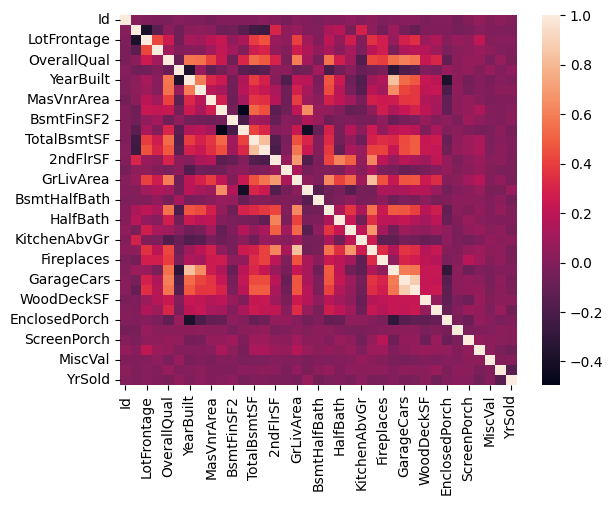

In [ ]:
corr_matrix = X.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns

sns.heatmap(corr_matrix, annot=False)
plt.show()